# Data Exploration

Let’s start practicing how to explore data. We will work with a dataset from a Kaggle competition: House Prices: Advanced Regression Techniques.

As usual, let's start with importing the right packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Load the data into a Pandas dataframe called df_train. It can be found here and display the first five rows of the data.
df_train = pd.read_csv('train.csv')

Next, check how many variables and observations we're dealing with:

In [3]:
print(df_train.shape)

(1460, 81)


Now, check the column names and their data types. We can do everything using one command we already know:

In [4]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

Let’s check if we have any duplicate ids in our data and remove them:

In [5]:
#chack for duplicates fo Id
idsUnique = len(set(df_train.Id))
idsTotal = df_train.shape[0]
idsdupe = idsTotal - idsUnique
print(idsdupe)
#drop Id column
df_train.drop("Id", axis = 1, inplace = True)

0


We see that there are no duplicates, which is good, so we can continue.

## Exploring the Target Variable

The goal of this competition was to predict the price of a house. These values are stored in the variable SalePrice.

Let's check the descriptive statistics and the histogram:

In [7]:
# descriptive statistics
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Count'>

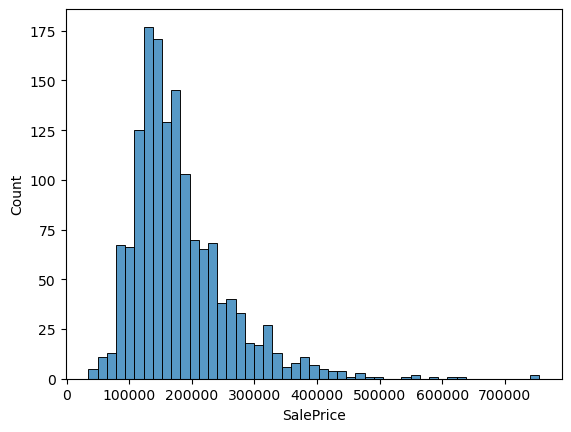

In [9]:
# histogram
sns.histplot(df_train['SalePrice'])


In the graph above we can observe the following things: - It slightly deviates from a normal distribution. - It's skewed. - It has some outliers (i.e. really huge prices).

## Relationship Between the Target Variable and Predictors

Firstly, let's start with some common sense (or domain knowledge):

* Do we think about this variable when we are buying a house? (e.g. when we think about the house of our dreams, do we care about its 'Masonry veneer type'?).
* If so, how important would this variable be? (e.g. what is the impact of having 'Excellent' material on the exterior instead of 'Poor'? And of having 'Excellent' instead of 'Good'?).
* Is this information already described in any other variable? (e.g. if 'LandContour' gives the flatness of the property, do we really need to know the 'LandSlope'?).

We can print a list of all columns:

In [10]:
sorted(list(df_train.columns))

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'Alley',
 'BedroomAbvGr',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Fireplaces',
 'Foundation',
 'FullBath',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenAbvGr',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotArea',
 'LotConfig',
 'LotFrontage',
 'LotShape',
 'LowQualFinSF',
 'MSSubClass',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'Neighborhood',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PavedDrive',
 'PoolArea',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'Sa

Let's go through the list above using the documentation and think about what could be useful. 

We've done the exercise as well and came up with the following variables:

* OverallQual - a tricky variable, an interesting exercise would be to predict 'OverallQual' using all the other variables available
* YearBuilt
* Neighborhood
* TotalBsmtSF
* GrLivArea

Now, we are going to check the relationship of these variables with the target variable SalePrice. You can continue with our list or feel free to replicate the steps with your own list.

## Numerical Variables

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

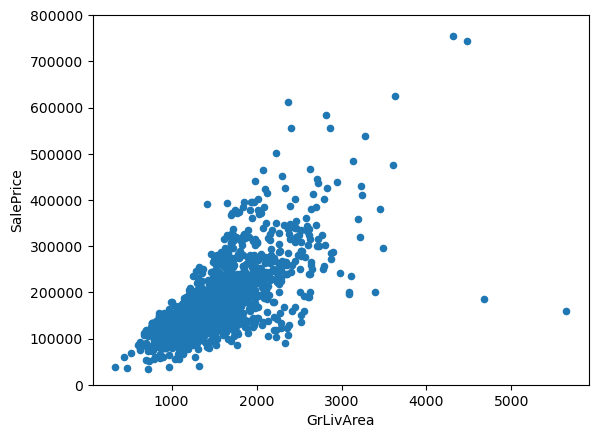

In [11]:
# scatter plot grlivarea vs. SalePrice
var = 'GrLivArea'
data = df_train[['SalePrice',var]]
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))


We can see a linear relationship in the picture above.

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

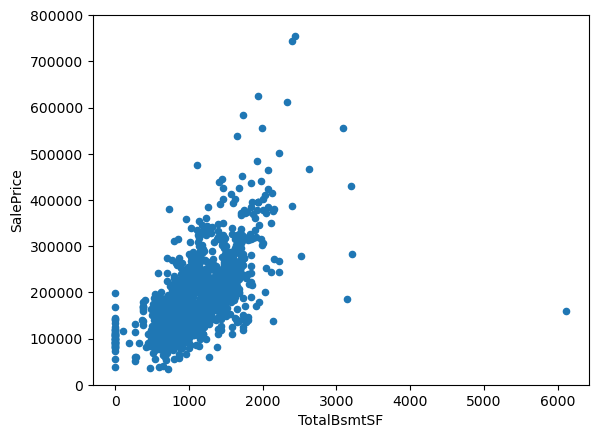

In [12]:
# scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = df_train[['SalePrice',var]]
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))


Here, we can see a quadratic relationship.

## Categorical Variables

(-0.5, 9.5, 0.0, 800000.0)

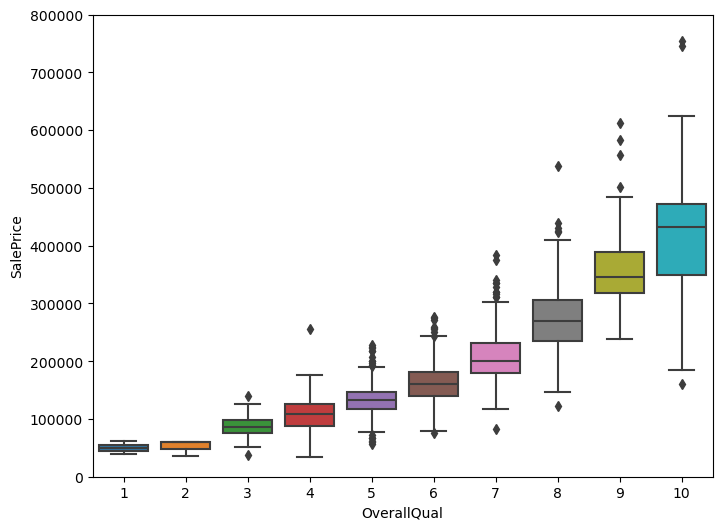

In [13]:
# overallqual
var = 'OverallQual'
data = df_train[['SalePrice',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

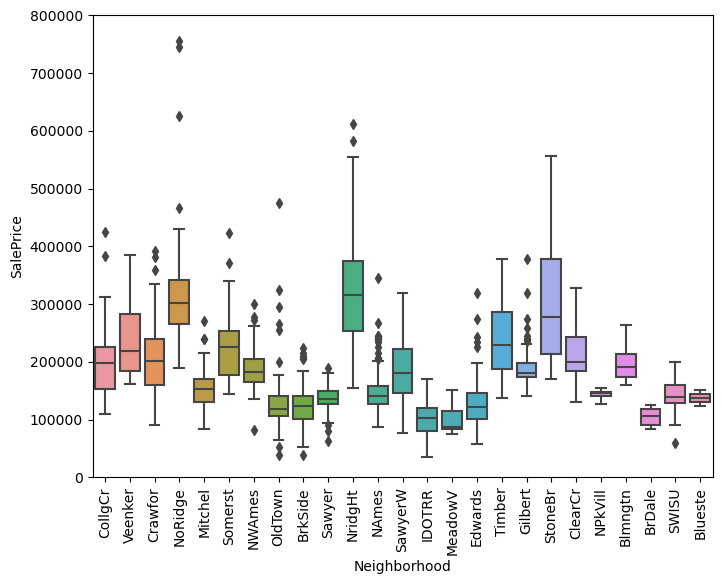

In [14]:
# Neighborhood
var = 'Neighborhood'
data = df_train[['SalePrice',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

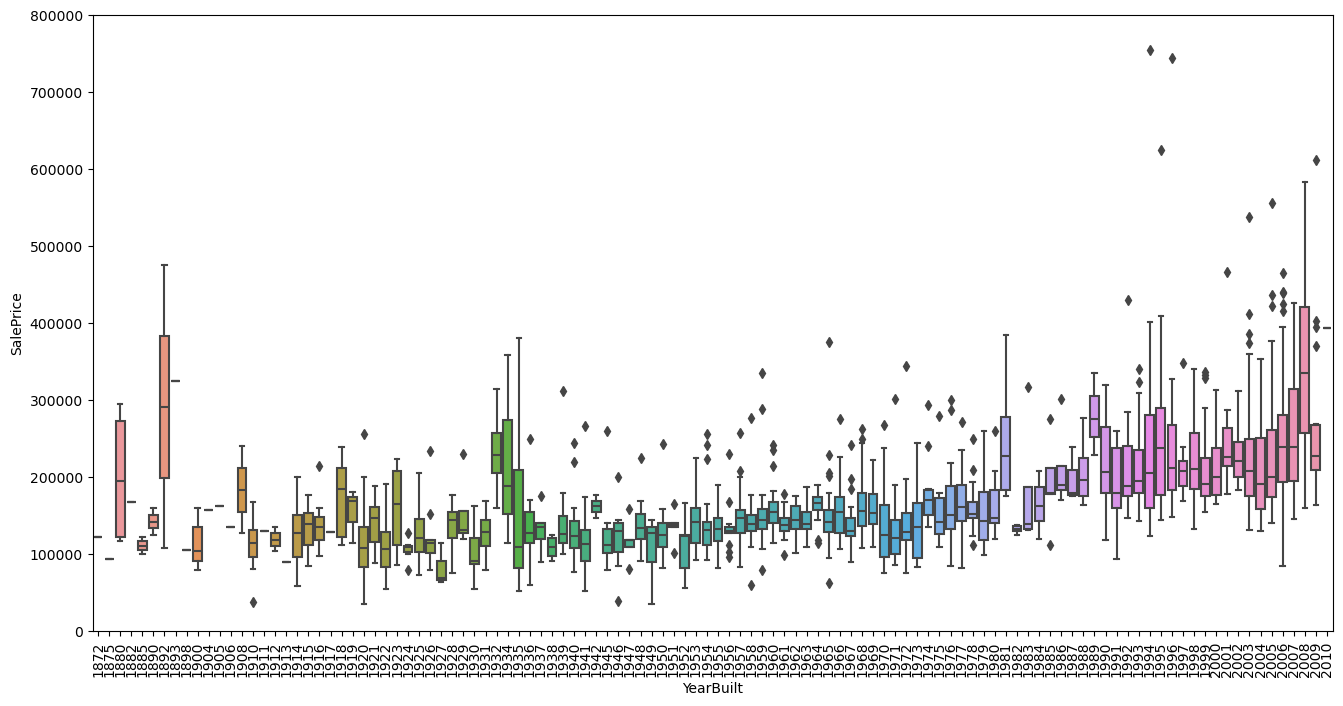

In [15]:
# YearBuilt
var = 'YearBuilt'
data = df_train[['SalePrice',var]]
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)


## Multivariate Analysis

Let's look at a correlation matrix between numeric attributes:

<Axes: >

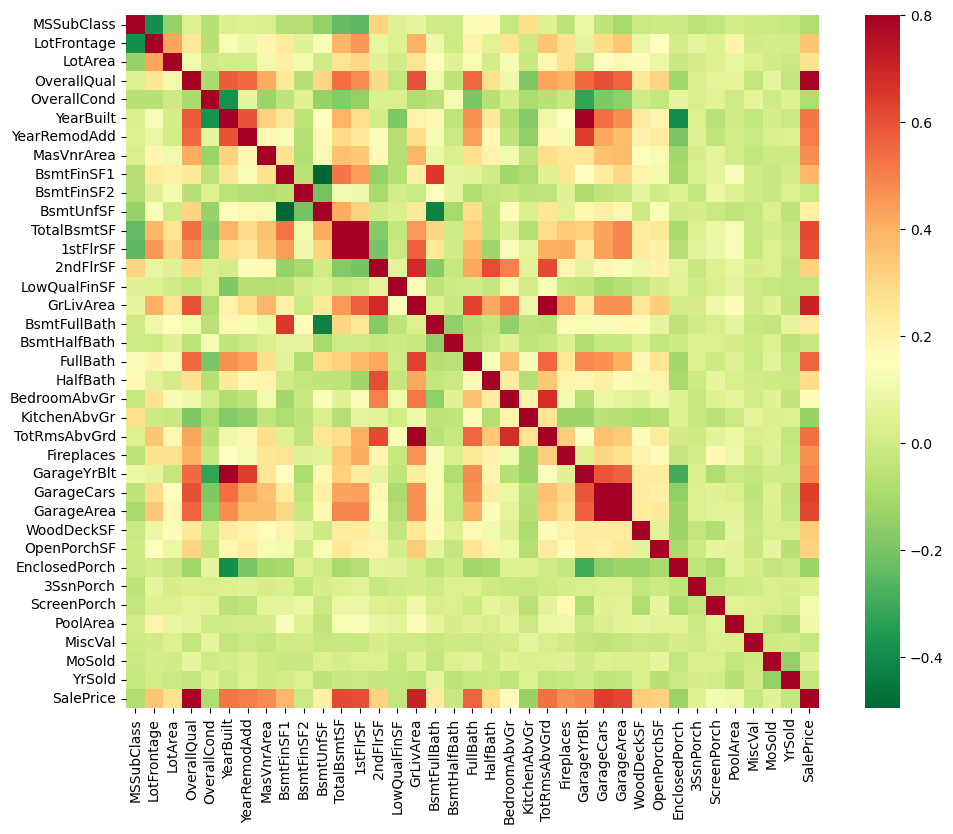

In [16]:
# correlation matrix
corrmat = df_train.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="RdYlGn_r")


To make it more readable we can plot only those variables that correlate with the target variable more than 0.5:

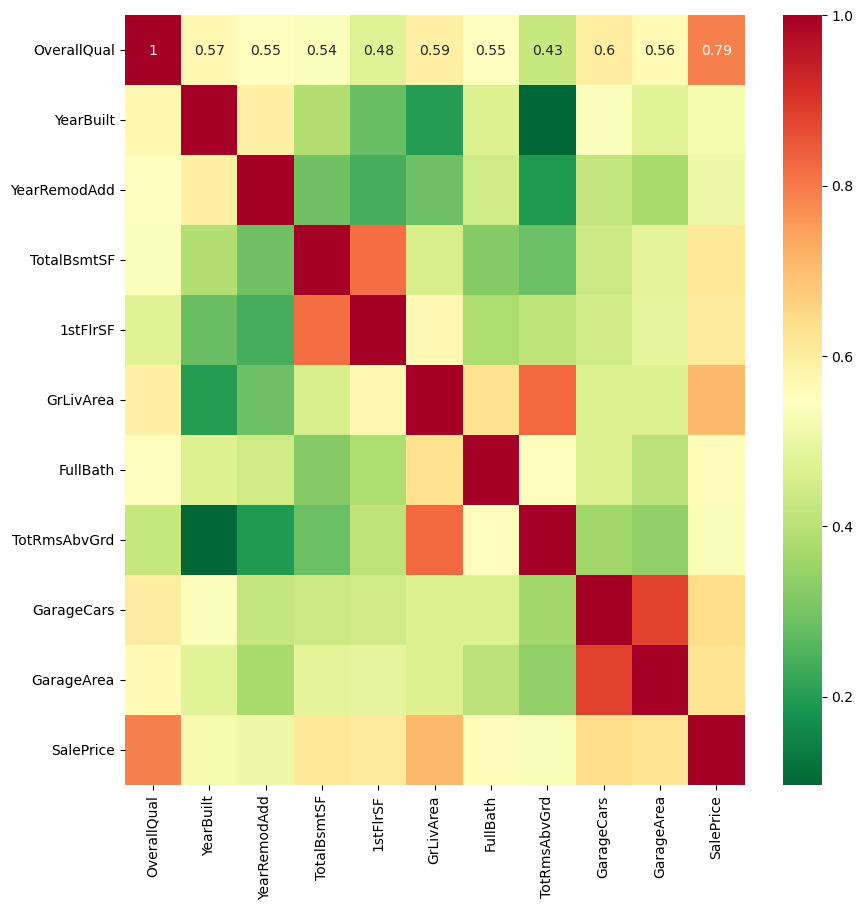

In [17]:
# most correlated features with SalePrice
corrmat = df_train.corr(numeric_only=True)
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(df_train[top_corr_features].corr(numeric_only=True),annot=True,cmap="RdYlGn_r")


These are the variables most correlated with SalePrice. Our thoughts on this:

* 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. Check!
* 'GarageCars' and 'GarageArea' are also among the most strongly correlated variables. The number of cars that fit into a garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
* 'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to be able to say that our first guess was right :).
* 'FullBath'?? Really?
* 'TotRmsAbvGrd' and 'GrLivArea' – twin brothers again.
* 'YearBuilt': It seems that 'YearBuilt' is slightly correlated with 'SalePrice'. Therefore, we could also look at the problem as time-series analysis but we will get into that later.


# Null Value Replacement

## Why Do We Care?

Missing data in a data set can reduce the power/fit of a model if treated as a real category, because:

* Some models ignore rows with missing values effectively reducing your sample size.
* It can lead to a wrong prediction or classification.
* Missing values do not always mean an empty field.

Let's take a look at a very simple example in the table below. In the left table, we have two missing values in the 'gender' column. 

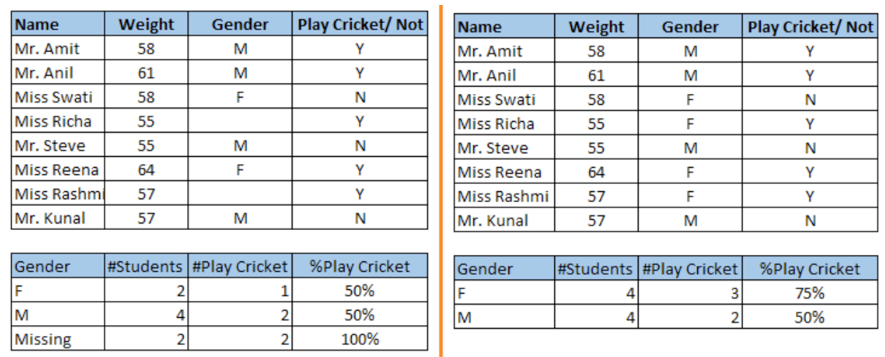


If we don’t fill in the null values, our conclusion is that both women and men in the data are equally likely to play cricket.

However, when we fill in the missing values, based on the 'name' column, we get the actual result:

* Women – 75% play cricket
* Men – 50% play cricket

The null value replacement allows us to come to the more accurate conclusion that women are more likely to play cricket than men.

## How to Handle Missing Values

There are many different ways of dealing with missing values. It depends on the size of the data we have, the data type, or what model we want to use.

Follow the article Handling Missing Data(https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html) to learn the most popular ways of handling missing values.

In [18]:
# missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


There are a couple of columns, where most of the values are missing. We can get rid of these since they don't have any value for us.

In [19]:
# drop 5 columns with the biggest ratio of null values
to_drop = missing_data.head(5).index.tolist()
df_train.drop(to_drop, axis=1, inplace=True)


Be careful when removing columns. Sometimes a column can give us some relevant information even if 50% of values are Null. It's always good to be cautious when removing columns.

We don't want to remove more than 5 columns because the rest don't have a lot of missing values.

Let's check the data types of the columns with missing values.

In [20]:
# extract the names of columns with missing values
cols_with_missing = missing_data[missing_data.Percent > 0].index.tolist()
# remove column names that are already removed from dataset
missing_cols = list(set(cols_with_missing) - set(to_drop))
# check the datatype
df_train.dtypes[missing_cols]


GarageYrBlt     float64
FireplaceQu      object
Electrical       object
GarageCond       object
GarageType       object
MasVnrArea      float64
BsmtFinType1     object
BsmtExposure     object
BsmtQual         object
GarageFinish     object
LotFrontage     float64
BsmtCond         object
GarageQual       object
BsmtFinType2     object
dtype: object

We can see that we have a few numeric variables and some with text inside. First, we will take a look at the numeric ones.


## Numeric Variables

We will create a separate column to keep the information whether the value was missing. This way, we will have this information available in this column after we replace the value in the original one.

In [21]:
num_cols_with_missing = df_train.dtypes[missing_cols][df_train.dtypes[missing_cols] == 'float'].index.tolist()
# create new variable with the information that it was missing
for cl in num_cols_with_missing:
    df_train[cl + "_missing_ind"] = 0
    df_train.loc[df_train[cl].isnull(), cl + "_missing_ind"] = 1

Now we can work on the Null value replacement.

In [22]:
df_train["LotFrontage"] = df_train["LotFrontage"].fillna(df_train["LotFrontage"].mean())
df_train["GarageYrBlt"] = df_train["GarageYrBlt"].fillna(df_train["GarageYrBlt"].min())
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(0)


* LotFrontage – We replace the missing values with the mean.
* GarageYrBlt – If the house has a garage and the year is missing, we assume it's the same year the house was built.
* MasVnrArea – If the veneer area is missing, we assume it's 0.


## Object (String) Variables


Find the variables with the dtype == "object" and having at least one missing value.


In [23]:
# 2. for categorical variables:
df_train.dtypes[missing_cols][df_train.dtypes[missing_cols] == 'object']
cat_cols_with_missing = df_train.dtypes[missing_cols][df_train.dtypes[missing_cols] == 'object'].index.tolist()


With the help of the data documentation we have, we can figure out that the missing values in Garage and Basement variables mean no garage and no basement respectively. Therefore, we will replace the missing values with "None".

In [24]:
# GarageFinish : data description says NA means "no garage"
df_train["GarageFinish"] = df_train["GarageFinish"].fillna("None")
# GarageCond : data description says NA means "no garage"
df_train["GarageCond"] = df_train["GarageCond"].fillna("None")
# GarageQual : data description says NA means "no garage"
df_train["GarageQual"] = df_train["GarageQual"].fillna("None")
# GarageType : data description says NA means "no garage"
df_train["GarageType"] = df_train["GarageType"].fillna("None")

# BsmtExposure : data description says NA means "no basement"
df_train["BsmtExposure"] = df_train["BsmtExposure"].fillna("None")
# BsmtFinType2 : data description says NA means "no basement"
df_train["BsmtFinType2"] = df_train["BsmtFinType2"].fillna("None")
# BsmtFinType1 : data description says NA means "no basement"
df_train["BsmtFinType1"] = df_train["BsmtFinType1"].fillna("None")
# BsmtCond : data description says NA means "no basement"
df_train["BsmtCond"] = df_train["BsmtCond"].fillna("None")
# BsmtQual : data description says NA means "no basement"
df_train["BsmtQual"] = df_train["BsmtQual"].fillna("None")


The information about Electrical and MasVnrType is missing in the documentation. Since we are dealing with categorical variables, we will create a new category for a missing value.

In [25]:
df_train["Electrical"] = df_train["Electrical"].fillna("Empty")
df_train["MasVnrType"] = df_train["MasVnrType"].fillna("Empty")

KeyError: 'MasVnrType'